### Feature importance / selection

Relevant characteristics: 
- numerical inputs (16 features)
- categorical output

#### Taxonomy: 

- Feature selection
- Unsupervised
- Wrapper Methods
    - Sequential
    - Bio inspired
    - Iterative
-Filter Methods
- Multivariate
    - Statistical / Information
    - Bio-inspired
    - Spectral/Sparse Learning

#### Load Libraries

In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

#### Load Dataset

In [3]:
header = list(range(1, 17))
header = ["letter"] + header

letter_df_complete = pd.read_csv('../../Data/letter-recognition.data', 
sep = ",", 
names = header)

In [4]:
def filter_dataset(letter, dataset=letter_df_complete, rand_state = 0):
    #Filter for the letter
    dataset_letter = dataset[dataset["letter"] == letter]

    #Create a copy of the dataset without the letter
    dataset_wo_let = dataset_letter.drop('letter', axis = 1)

    return dataset_letter, dataset_wo_let

In [6]:
d_data, d_wo_data = filter_dataset("D")
m_data, m_wo_data = filter_dataset("M")
f_data, f_wo_data = filter_dataset("F")


#### Approach: Statistical Mesures

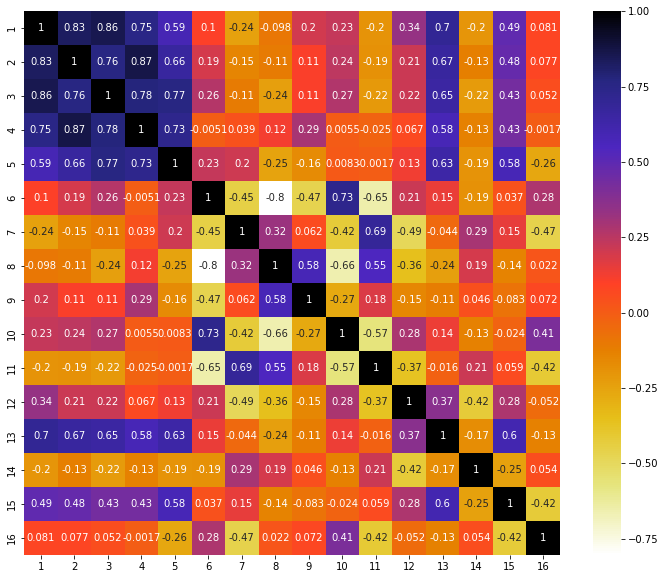

In [10]:
cor = d_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

In [16]:
def correlation(dataset, threshold=0.7):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
            col_corr.add(colname)
    return col_corr 

In [18]:
corr_features = correlation(d_data, 0.7)
corr_features

{2, 3, 4, 5, 8, 10}

In [19]:
d_data_mod = d_data.drop(corr_features, axis = 1)

#### Based on knowledge

#### Approach: ANOVA

Source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
Argumentation: numerical inputs and categorical outputs (not ordinal)

Problem: at some point, we need to know the labels

In [9]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)
